In [172]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline

In [173]:
f1 = lambda x: 1 / (1 + 25 * x**2)
range1 = (-1, 1)
f2 = lambda x: np.exp(np.cos(x))
range2 = (0, 2 * np.pi)

In [174]:
def generate_uniform_nodes(n: int, range_: (float, float)):
    a, b = range_
    return np.linspace(a, b, n)

In [175]:
def generate_chebyshev_nodes(n: int, range_: (float, float)):
    a, b = range_
    i = np.arange(1, n + 1)
    return (a + b) / 2 + (b - a) / 2 * -np.cos((2 * i - 1) * np.pi / (2 * n))

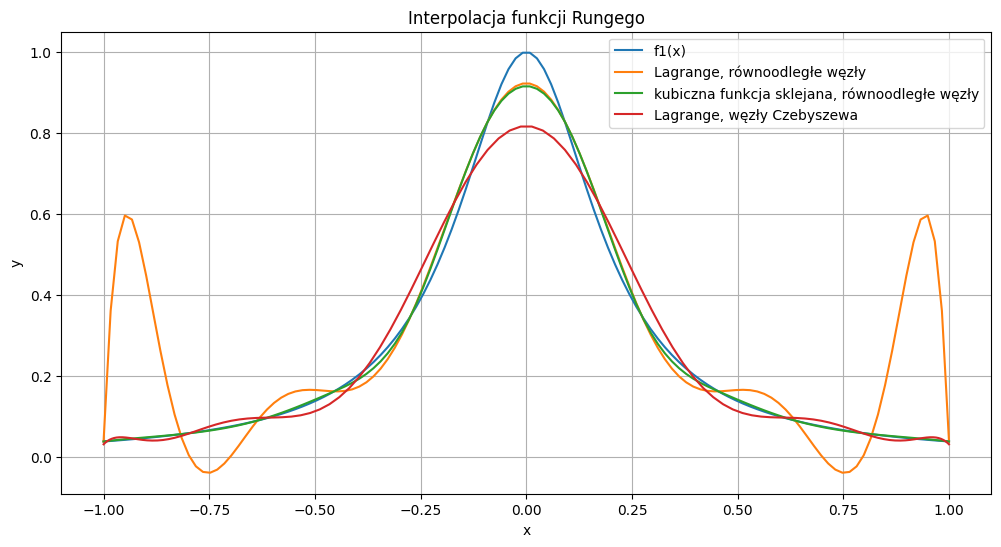

In [176]:
n = 12

uniform_x = generate_uniform_nodes(n, range1)
uniform_f1 = f1(uniform_x)
chebyshev_x = generate_chebyshev_nodes(n, range1)
chebyshev_f1 = f1(chebyshev_x)

uniform_x_plot = generate_uniform_nodes(n * 10, range1)
chebyshev_x_plot = generate_chebyshev_nodes(n * 10, range1)

uniform_lagrange_polynomial = lagrange(uniform_x, uniform_f1)
uniform_cubic_spline = CubicSpline(uniform_x, uniform_f1)
chebyshev_lagrange_polynomial = lagrange(chebyshev_x, chebyshev_f1)

plt.figure(figsize=(12, 6))

plt.plot(uniform_x_plot, f1(uniform_x_plot), label='f1(x)')
plt.plot(uniform_x_plot, uniform_lagrange_polynomial(uniform_x_plot), label='Lagrange, równoodległe węzły')
plt.plot(uniform_x_plot, uniform_cubic_spline(uniform_x_plot), label='kubiczna funkcja sklejana, równoodległe węzły')
plt.plot(chebyshev_x_plot, chebyshev_lagrange_polynomial(chebyshev_x_plot), label='Lagrange, węzły Czebyszewa')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Interpolacja funkcji Rungego')
plt.legend()
plt.grid(True)
plt.show()

In [177]:
def generate_500_rand_points(range_: (float, float)):
    a, b = range_
    points = np.random.uniform(low=a, high=b, size=500)
    points.sort()
    return points

In [178]:
def generate_interpolated_y_vec(x_nodes, x_vec, func, interpolation_method):
    y_nodes = func(x_nodes)
    interpolated_func = interpolation_method(x_nodes, y_nodes)
    return interpolated_func(x_vec)

In [179]:
n_range = range(4, 51)
x_vec_range1 = generate_500_rand_points(range1)
x_vec_range2 = generate_500_rand_points(range2)
y_vec_range1 = f1(x_vec_range1)
y_vec_range2 = f2(x_vec_range2)

f1_lagrange_uniform = [generate_interpolated_y_vec(
    generate_uniform_nodes(n, range1),
    x_vec_range1,
    f1, lagrange
) for n in n_range]
f2_lagrange_uniform = [generate_interpolated_y_vec(
    generate_uniform_nodes(n, range2),
    x_vec_range2,
    f2, lagrange
) for n in n_range]

f1_cubic_spline_uniform = [generate_interpolated_y_vec(
    generate_uniform_nodes(n, range1),
    x_vec_range1,
    f1, CubicSpline
) for n in n_range]
f2_cubic_spline_uniform = [generate_interpolated_y_vec(
    generate_uniform_nodes(n, range2),
    x_vec_range2,
    f2, CubicSpline
) for n in n_range]

f1_lagrange_chebyshev = [generate_interpolated_y_vec(
    generate_chebyshev_nodes(n, range1),
    x_vec_range1,
    f1, lagrange
) for n in n_range]
f2_lagrange_chebyshev = [generate_interpolated_y_vec(
    generate_chebyshev_nodes(n, range2),
    x_vec_range2,
    f2, lagrange
) for n in n_range]

def get_norms(vectors):
    return [np.linalg.norm(vec) for vec in vectors]

f1_lagrange_uniform_err = get_norms(abs(f1_lagrange_uniform - y_vec_range1))
f2_lagrange_uniform_err = get_norms(abs(f2_lagrange_uniform - y_vec_range2))
f1_cubic_spline_uniform_err = get_norms(abs(f1_cubic_spline_uniform - y_vec_range1))
f2_cubic_spline_uniform_err = get_norms(abs(f2_cubic_spline_uniform - y_vec_range2))
f1_lagrange_chebyshev_err = get_norms(abs(f1_lagrange_chebyshev - y_vec_range1))
f2_lagrange_chebyshev_err = get_norms(abs(f2_lagrange_chebyshev - y_vec_range2))

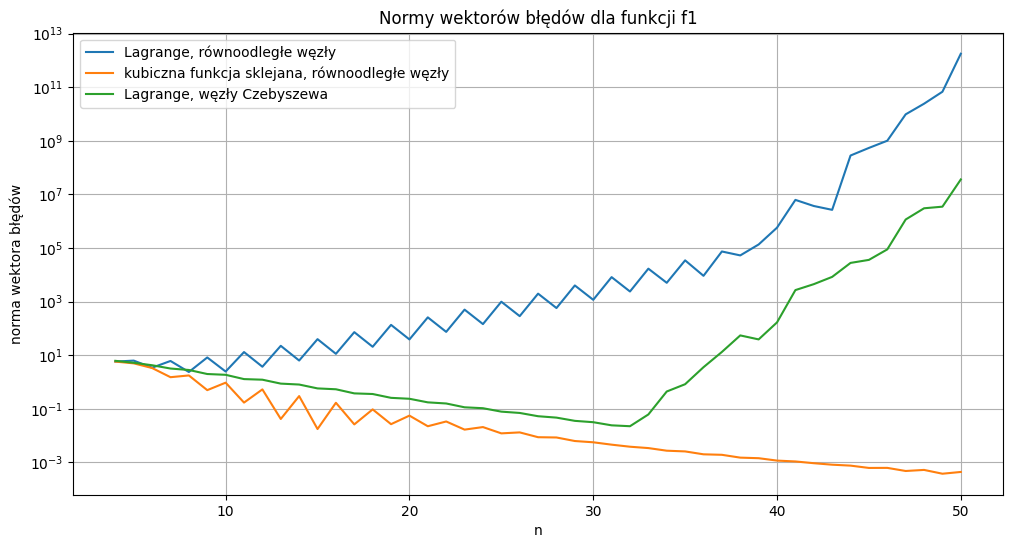

In [180]:
plt.figure(figsize=(12, 6))

plt.semilogy(n_range, f1_lagrange_uniform_err, label='Lagrange, równoodległe węzły')
plt.semilogy(n_range, f1_cubic_spline_uniform_err, label='kubiczna funkcja sklejana, równoodległe węzły')
plt.semilogy(n_range, f1_lagrange_chebyshev_err, label=f'Lagrange, węzły Czebyszewa')

plt.xlabel('n')
plt.ylabel('norma wektora błędów')
plt.title('Normy wektorów błędów dla funkcji f1')
plt.legend()
plt.grid(True)
plt.show()

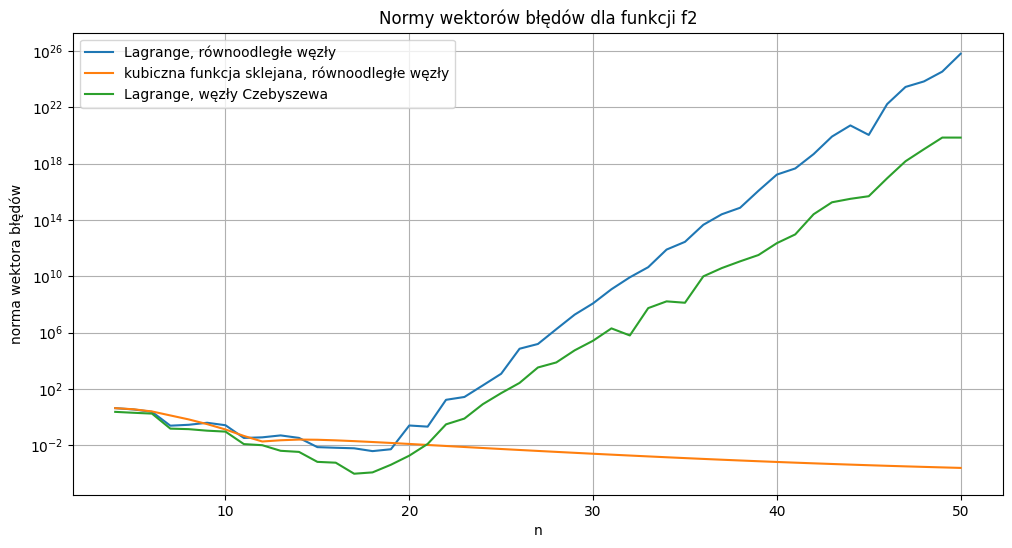

In [181]:
plt.figure(figsize=(12, 6))

plt.semilogy(n_range, f2_lagrange_uniform_err, label='Lagrange, równoodległe węzły')
plt.semilogy(n_range, f2_cubic_spline_uniform_err, label='kubiczna funkcja sklejana, równoodległe węzły')
plt.semilogy(n_range, f2_lagrange_chebyshev_err, label=f'Lagrange, węzły Czebyszewa')

plt.xlabel('n')
plt.ylabel('norma wektora błędów')
plt.title('Normy wektorów błędów dla funkcji f2')
plt.legend()
plt.grid(True)
plt.show()